# Lecture 08: Working with dates
2019-06-11

Course material is available at http://unihb.eu/pdap2019

## References

- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
- https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.date2num https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.num2date

## Transcript

1. Python `datetime` objects
2. NumPy `datetime64` dtypes
3. Pandas time handling
4. Ranges / arrays of date objects
5. Converting between Pandas, NumPy, and Python `datetime`
6. Accessing time information from Pandas
7. Converting between numbers and dates
8. Working with time series

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## Python `datetime` objects

In [2]:
import datetime
mydate = datetime.datetime(year=2019, month=6, day=11)
mydate

datetime.datetime(2019, 6, 11, 0, 0)

In [3]:
mydate.strftime('%A, %dth of %B of the year %Y')

'Tuesday, 11th of June of the year 2019'

In [4]:
'{:%A, %dth of %B of the year %Y}'.format(mydate)

'Tuesday, 11th of June of the year 2019'

In [5]:
import dateutil.parser

In [6]:
dateutil.parser.parse('4th of July 2019')

datetime.datetime(2019, 7, 4, 0, 0)

In [7]:
dateutil.parser.parse('12.11.2011', dayfirst=True)

datetime.datetime(2011, 11, 12, 0, 0)

In [8]:
datetime.datetime.strptime('12.11.2011', '%m.%d.%Y')

datetime.datetime(2011, 12, 11, 0, 0)

In [9]:
mydate

datetime.datetime(2019, 6, 11, 0, 0)

In [10]:
mydate + datetime.timedelta(minutes=12, seconds=5)

datetime.datetime(2019, 6, 11, 0, 12, 5)

## NumPy `datetime64` dtype

In [11]:
ndate = np.datetime64('2015-07-14')
ndate

numpy.datetime64('2015-07-14')

In [12]:
ndate + 1

numpy.datetime64('2015-07-15')

In [13]:
ndate + np.arange(10)

array(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21',
       '2015-07-22', '2015-07-23'], dtype='datetime64[D]')

In [14]:
# better use nanosecond resultion
ndate = np.datetime64('2015-07-14', 'ns')
ndate

numpy.datetime64('2015-07-14T00:00:00.000000000')

## Pandas time handling

In [15]:
pdate = pd.to_datetime('4th of July 2019')
pdate

Timestamp('2019-07-04 00:00:00')

In [16]:
pdate.strftime('%A, %B %d, %Y')

'Thursday, July 04, 2019'

In [17]:
pdate + pd.to_timedelta(np.arange(10), 'D')

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-13'],
              dtype='datetime64[ns]', freq=None)

In [18]:
pd.Timedelta(12, 's')

Timedelta('0 days 00:00:12')

In [19]:
pdate + pd.Timedelta(12, 's')

Timestamp('2019-07-04 00:00:12')

In [20]:
data = pd.Series(np.arange(10, 20), index=pdate + pd.to_timedelta(np.arange(10), 'D'))
data

2019-07-04    10
2019-07-05    11
2019-07-06    12
2019-07-07    13
2019-07-08    14
2019-07-09    15
2019-07-10    16
2019-07-11    17
2019-07-12    18
2019-07-13    19
dtype: int64

In [21]:
data['2019-07-08':'2019-07-11']

2019-07-08    14
2019-07-09    15
2019-07-10    16
2019-07-11    17
dtype: int64

In [22]:
data = pd.Series(np.arange(10, 20), index=pdate + pd.to_timedelta(np.arange(10), 'M'))
data

2019-07-04 00:00:00    10
2019-08-03 10:29:06    11
2019-09-02 20:58:12    12
2019-10-03 07:27:18    13
2019-11-02 17:56:24    14
2019-12-03 04:25:30    15
2020-01-02 14:54:36    16
2020-02-02 01:23:42    17
2020-03-03 11:52:48    18
2020-04-02 22:21:54    19
dtype: int64

## Ranges of datetime objects

In [23]:
# evenly spaced
pd.date_range('2019-07-04', '2020-04-04', 10)

DatetimeIndex(['2019-07-04 00:00:00', '2019-08-03 13:20:00',
               '2019-09-03 02:40:00', '2019-10-03 16:00:00',
               '2019-11-03 05:20:00', '2019-12-03 18:40:00',
               '2020-01-03 08:00:00', '2020-02-02 21:20:00',
               '2020-03-04 10:40:00', '2020-04-04 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [24]:
# with frequency monthly, pandas puts the timestamp to the last day of each month
pd.date_range('2019-07-04', '2020-04-04', freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
# no need to specify days when using monthly series
pd.date_range('2019-07', '2020-04', freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
# for a list of 4th days for each month, start with a monthly range and add 4 days
pd.date_range('2019-06', '2020-04', freq='M') + pd.Timedelta(4, 'D')

DatetimeIndex(['2019-07-04', '2019-08-04', '2019-09-04', '2019-10-04',
               '2019-11-04', '2019-12-04', '2020-01-04', '2020-02-04',
               '2020-03-04', '2020-04-04'],
              dtype='datetime64[ns]', freq=None)

#### Date ranges in Python `datetime`

In [27]:
import dateutil.relativedelta

In [28]:
mydate

datetime.datetime(2019, 6, 11, 0, 0)

In [29]:
mydate + dateutil.relativedelta.relativedelta(months=1)

datetime.datetime(2019, 7, 11, 0, 0)

In [30]:
datetime.datetime(2020, 2, 20) + dateutil.relativedelta.relativedelta(months=1)

datetime.datetime(2020, 3, 20, 0, 0)

## Working with Pandas time series

In [31]:
data2 = pd.Series(np.arange(10, 20), index=pd.date_range('2019-06', '2020-04', freq='M') + pd.Timedelta(4, 'D'))
data2['2019']

2019-07-04    10
2019-08-04    11
2019-09-04    12
2019-10-04    13
2019-11-04    14
2019-12-04    15
dtype: int64

In [32]:
pd.date_range('2015-07-23', periods=8)

DatetimeIndex(['2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range('2015-07-23', periods=8, freq='H')

DatetimeIndex(['2015-07-23 00:00:00', '2015-07-23 01:00:00',
               '2015-07-23 02:00:00', '2015-07-23 03:00:00',
               '2015-07-23 04:00:00', '2015-07-23 05:00:00',
               '2015-07-23 06:00:00', '2015-07-23 07:00:00'],
              dtype='datetime64[ns]', freq='H')

## Converting between the different datetime implementations

#### Pandas to X

In [34]:
pdate.to_pydatetime()

datetime.datetime(2019, 7, 4, 0, 0)

In [35]:
pdate.to_datetime64()

numpy.datetime64('2019-07-04T00:00:00.000000000')

#### NumPy to X

In [36]:
ndate

numpy.datetime64('2015-07-14T00:00:00.000000000')

In [37]:
ndate.astype(datetime.datetime)

1436832000000000000

In [38]:
# CAUTION:
ndate.astype(pd.Timestamp)

1436832000000000000

In [39]:
pd.Timestamp(ndate)

Timestamp('2015-07-14 00:00:00')

#### Python datetime to X

In [40]:
mydate

datetime.datetime(2019, 6, 11, 0, 0)

In [41]:
np.datetime64(mydate)

numpy.datetime64('2019-06-11T00:00:00.000000')

In [42]:
pd.Timestamp(mydate)

Timestamp('2019-06-11 00:00:00')

## Accessing datetime information from Pandas

In [43]:
myprange = pd.date_range('2019-06-11', '2019-06-14', freq='h')

In [44]:
myprange.day

Int64Index([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
            11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
            13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
            13, 13, 13, 13, 14],
           dtype='int64')

In [45]:
myprange.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23,  0],
           dtype='int64')

In [46]:
myprange[myprange.hour == 13]

DatetimeIndex(['2019-06-11 13:00:00', '2019-06-12 13:00:00',
               '2019-06-13 13:00:00'],
              dtype='datetime64[ns]', freq=None)

In [47]:
myprange[myprange.weekday_name == 'Wednesday']

DatetimeIndex(['2019-06-12 00:00:00', '2019-06-12 01:00:00',
               '2019-06-12 02:00:00', '2019-06-12 03:00:00',
               '2019-06-12 04:00:00', '2019-06-12 05:00:00',
               '2019-06-12 06:00:00', '2019-06-12 07:00:00',
               '2019-06-12 08:00:00', '2019-06-12 09:00:00',
               '2019-06-12 10:00:00', '2019-06-12 11:00:00',
               '2019-06-12 12:00:00', '2019-06-12 13:00:00',
               '2019-06-12 14:00:00', '2019-06-12 15:00:00',
               '2019-06-12 16:00:00', '2019-06-12 17:00:00',
               '2019-06-12 18:00:00', '2019-06-12 19:00:00',
               '2019-06-12 20:00:00', '2019-06-12 21:00:00',
               '2019-06-12 22:00:00', '2019-06-12 23:00:00'],
              dtype='datetime64[ns]', freq='H')

## Converting between numbers and dates

In [48]:
from netCDF4 import date2num, num2date

In [49]:
myprange[:10]

DatetimeIndex(['2019-06-11 00:00:00', '2019-06-11 01:00:00',
               '2019-06-11 02:00:00', '2019-06-11 03:00:00',
               '2019-06-11 04:00:00', '2019-06-11 05:00:00',
               '2019-06-11 06:00:00', '2019-06-11 07:00:00',
               '2019-06-11 08:00:00', '2019-06-11 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [50]:
date2num(myprange[:10].to_pydatetime(), 'seconds since 2015-01-06T12:34:56')

array([1.39663504e+08, 1.39667104e+08, 1.39670704e+08, 1.39674304e+08,
       1.39677904e+08, 1.39681504e+08, 1.39685104e+08, 1.39688704e+08,
       1.39692304e+08, 1.39695904e+08])

In [51]:
date2num(myprange[:10].to_pydatetime(), 'days since 1992-12-31T00:00:00')

array([9658.        , 9658.04166667, 9658.08333333, 9658.125     ,
       9658.16666667, 9658.20833333, 9658.25      , 9658.29166667,
       9658.33333333, 9658.375     ])

In [52]:
num2date(np.arange(49), 'days since 2019-06-11T00:00:00')

array([real_datetime(2019, 6, 11, 0, 0), real_datetime(2019, 6, 12, 0, 0),
       real_datetime(2019, 6, 13, 0, 0), real_datetime(2019, 6, 14, 0, 0),
       real_datetime(2019, 6, 15, 0, 0), real_datetime(2019, 6, 16, 0, 0),
       real_datetime(2019, 6, 17, 0, 0), real_datetime(2019, 6, 18, 0, 0),
       real_datetime(2019, 6, 19, 0, 0), real_datetime(2019, 6, 20, 0, 0),
       real_datetime(2019, 6, 21, 0, 0), real_datetime(2019, 6, 22, 0, 0),
       real_datetime(2019, 6, 23, 0, 0), real_datetime(2019, 6, 24, 0, 0),
       real_datetime(2019, 6, 25, 0, 0), real_datetime(2019, 6, 26, 0, 0),
       real_datetime(2019, 6, 27, 0, 0), real_datetime(2019, 6, 28, 0, 0),
       real_datetime(2019, 6, 29, 0, 0), real_datetime(2019, 6, 30, 0, 0),
       real_datetime(2019, 7, 1, 0, 0), real_datetime(2019, 7, 2, 0, 0),
       real_datetime(2019, 7, 3, 0, 0), real_datetime(2019, 7, 4, 0, 0),
       real_datetime(2019, 7, 5, 0, 0), real_datetime(2019, 7, 6, 0, 0),
       real_datetime(2019, 7, 7

In [53]:
# CAUTION: the result only has a resolution of ~100us, so you might get some "strange" / unexpexted results:
pdrange = num2date(np.arange(49), 'hours since 2019-06-11T00:00:00')
pdrange

array([real_datetime(2019, 6, 11, 0, 0), real_datetime(2019, 6, 11, 1, 0),
       real_datetime(2019, 6, 11, 2, 0, 0, 13),
       real_datetime(2019, 6, 11, 3, 0), real_datetime(2019, 6, 11, 4, 0),
       real_datetime(2019, 6, 11, 5, 0, 0, 13),
       real_datetime(2019, 6, 11, 6, 0), real_datetime(2019, 6, 11, 7, 0),
       real_datetime(2019, 6, 11, 8, 0, 0, 13),
       real_datetime(2019, 6, 11, 9, 0),
       real_datetime(2019, 6, 11, 10, 0),
       real_datetime(2019, 6, 11, 11, 0, 0, 13),
       real_datetime(2019, 6, 11, 12, 0),
       real_datetime(2019, 6, 11, 13, 0),
       real_datetime(2019, 6, 11, 14, 0, 0, 13),
       real_datetime(2019, 6, 11, 15, 0),
       real_datetime(2019, 6, 11, 16, 0),
       real_datetime(2019, 6, 11, 17, 0, 0, 13),
       real_datetime(2019, 6, 11, 18, 0),
       real_datetime(2019, 6, 11, 19, 0),
       real_datetime(2019, 6, 11, 20, 0, 0, 13),
       real_datetime(2019, 6, 11, 21, 0),
       real_datetime(2019, 6, 11, 22, 0),
       real_date

In [54]:
# In order to clean this up, I cannot think of anything simpler than converting to np.datetime64[s] and then converting back to Pandas:
pd.DatetimeIndex(np.asarray([d for d in pdrange], dtype='datetime64[s]'))

DatetimeIndex(['2019-06-11 00:00:00', '2019-06-11 01:00:00',
               '2019-06-11 02:00:00', '2019-06-11 03:00:00',
               '2019-06-11 04:00:00', '2019-06-11 05:00:00',
               '2019-06-11 06:00:00', '2019-06-11 07:00:00',
               '2019-06-11 08:00:00', '2019-06-11 09:00:00',
               '2019-06-11 10:00:00', '2019-06-11 11:00:00',
               '2019-06-11 12:00:00', '2019-06-11 13:00:00',
               '2019-06-11 14:00:00', '2019-06-11 15:00:00',
               '2019-06-11 16:00:00', '2019-06-11 17:00:00',
               '2019-06-11 18:00:00', '2019-06-11 19:00:00',
               '2019-06-11 20:00:00', '2019-06-11 21:00:00',
               '2019-06-11 22:00:00', '2019-06-11 23:00:00',
               '2019-06-12 00:00:00', '2019-06-12 01:00:00',
               '2019-06-12 02:00:00', '2019-06-12 03:00:00',
               '2019-06-12 04:00:00', '2019-06-12 05:00:00',
               '2019-06-12 06:00:00', '2019-06-12 07:00:00',
               '2019-06-

## Working with time series

In [55]:
ts = pd.read_csv('/data/pdap/FremontBridge.csv', index_col='Date', parse_dates=True)
ts.head()

Fremont Bridge East Sidewalk  \
Date                                                
2019-05-31 23:00:00                          22.0   
2019-05-31 22:00:00                          29.0   
2019-05-31 21:00:00                          46.0   
2019-05-31 20:00:00                          48.0   
2019-05-31 19:00:00                          97.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-05-31 23:00:00                          35.0  
2019-05-31 22:00:00                          52.0  
2019-05-31 21:00:00                          57.0  
2019-05-31 20:00:00                          92.0  
2019-05-31 19:00:00                         151.0

In [56]:
# the file is strangely organized from present to past, so we want to flip it around to have an increasing time axis:
ts = ts[::-1]
ts.head()

Fremont Bridge East Sidewalk  \
Date                                                
2012-10-03 00:00:00                           4.0   
2012-10-03 01:00:00                           4.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           2.0   
2012-10-03 04:00:00                           6.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0

In [57]:
ts.columns = ['East', 'West']
ts.head()

East  West
Date                           
2012-10-03 00:00:00   4.0   9.0
2012-10-03 01:00:00   4.0   6.0
2012-10-03 02:00:00   1.0   1.0
2012-10-03 03:00:00   2.0   3.0
2012-10-03 04:00:00   6.0   1.0

In [58]:
# eval() is an alternative way to specify operations 
ts['Total'] = ts.eval('East + West')
ts.head()

East  West  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0

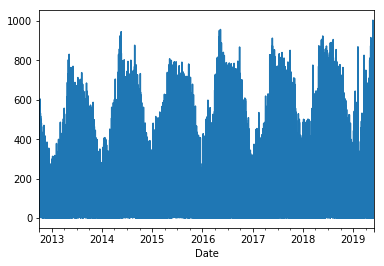

In [59]:
ts.Total.plot();

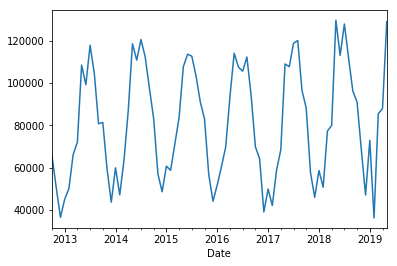

In [60]:
ts.Total.resample('M').sum().plot();

In [61]:
# asfreq() selects the last timestamp for each freq, i.e., the last value of a month when used like this:
tsdaily = ts.Total.asfreq('M')
tsdaily.head()

Date
2012-10-31    4.0
2012-11-30    7.0
2012-12-31    1.0
2013-01-31    5.0
2013-02-28    7.0
Freq: M, Name: Total, dtype: float64

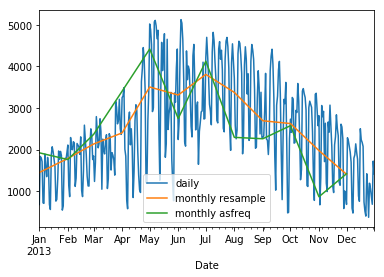

In [62]:
# in order to demonstrate, let's limit ourselves to a 2-year period and plot the three options:
ts.resample('D').sum().Total['2013'].plot(label='daily')  # daily values
ts.resample('D').sum().resample('M').mean().Total['2013'].plot(label='monthly resample')  # monthly average allocated to last day of month
ts.resample('D').sum().asfreq('M').Total['2013'].plot(label='monthly asfreq')  # last value of each month
plt.legend();

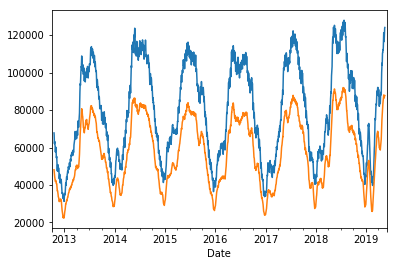

In [63]:
daily = ts.resample('D').sum().Total
daily.rolling(30, center=True).sum().plot()
daily.rolling(30, center=True, win_type='gaussian').sum(std=10).plot();